<a href="https://colab.research.google.com/github/MelKanyi/Week-6-IP/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_Melissa_Kanyi_Python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

      Predict the result of a game between team 1 and team 2, based on who's home and who's away,

        and on whether or not the game is friendly, and on whether or not the game is friendly - using five features i.e 
        Home team, Away team, Tournament type, Rank of home team and Rank of away team

### b) Defining the Metric for Success
Predicting, with an accuracy of 70% or an RMSE of 10% of the target variable mean
 
         1: how many goals the home team scores

         2: how many goals the away team scores

### c) Understanding the context 
My context will be in the form of the Project Overview

        You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

          A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the 
          game is friendly (include rank in your training).

          You have two possible approaches (as  shown below) given the datasets that will be provided

          Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

          Approach 1: Polynomial approach

          What to train given:

          Rank of home team
          Rank of away team
          Tournament type
          Model 1: Predict how many goals the home team scores

          Model 2: Predict how many goals the away team scores

 

          Approach 2 Logistic approach

          Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### d) Recording the Experimental Design
The expected flow for the assessment will be as follows:

    - Perform your EDA
    - Perform any necessary feature engineering
    - Check of multicollinearity
    - Start building the model
    - Cross-validate the model
    - Compute RMSE
    - Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
    - Perform appropriate regressions on the data including your justification
    
        NB: The assessment might not discretely follow the flow as outlined

### e) Appropriateness of the available Data

  Two datasets are available:

* Ranking dataset: contains the team ranks from 1993 to 2018

* Results dataset: contains matches and the team scores since 1892 to 2019

The link to the dataset is:

* https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc


# **Import necessary Libraries**

In [0]:
# Lets load all the necessary libraries for our workflow.
#
# Analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import pandas_profiling as pp

# Machine learning libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,  r2_score 
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')

# Other libraries
import datetime as dt

# 2. Reading the Data

In [0]:
# reading the data and changing it to datetime 
ranks = pd.read_csv('/content/fifa_ranking.csv', parse_dates = ['rank_date'])
ranks

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [0]:
# reading the data and changing it to datetime 
results = pd.read_csv('/content/results.csv', parse_dates = ['date'])
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


# 3. Checking the Data

In [0]:
# Previewing the top of our dataset
#
ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# Previewing the bottom of our dataset
# 
ranks.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [0]:
# Previewing the top of our dataset
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# Previewing the bottom of our dataset
# 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
# Checking whether each column has an appropriate datatype
#
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


All the columns have appropriate data types.

In [0]:
# Checking whether each column has an appropriate datatype
#
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null datetime64[ns]
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


All the columns have appropriate data types.

# Data Cleaning

In [0]:
# check for duplicates
duplicated = ranks[ranks.duplicated()]
duplicated.shape

(37, 16)

In [0]:
# deleting the duplicated values
ranks = ranks.drop_duplicates()

In [0]:
# identify missing data in the ranks dataset
ranks.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [0]:
# identify missing data in the results dataset
results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

> From the codes above, we can see that there are no missing values in both dataframes

# Exploratory Data Analysis & Feature Engineering


We will use Pandas Profiling to get an overview of both our dataframes

and their statistical summaries

In [0]:
# Getting an overview of the ranks dataframe
pp.ProfileReport(ranks)

Number of variables,17
Number of observations,57756
Total Missing (%),0.0%
Total size in memory,7.5 MiB
Average record size in memory,136.0 B
Numeric,5
Categorical,3
Boolean,0
Date,1
Text (Unique),0
Rejected,8


In [0]:
# Getting an overview of the results dataframe
pp.ProfileReport(results)

Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,5
Boolean,1
Date,1
Text (Unique),0
Rejected,0


In [0]:
# changing the full country column name in ranking dataset to home_team

ranks = ranks.rename({'country_full': 'home_team'}, axis = 1)
ranks.head(2)

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [0]:
# The new column is goal_diff i.e. 
# difference in goals between the home and the away teams

results['goal_diff'] = results['home_score'] - results['away_score']
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [0]:
# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called home_status


def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
results['home_status'] = results.goal_diff.apply(lambda j: home_team(j))

In [0]:
# checking the changes in the dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win


In [0]:
# Creating a second function to specify whether its a win, loss or a draw based on a away team perspective
# Applying the function in a new column called away_status


def away_team(away_goals):
    if away_goals < 0:
        return 'win'
    elif away_goals > 0:
        return 'loss'
    else:
        return 'draw'
      
results['away_status'] = results.goal_diff.apply(lambda w: away_team(w))

In [0]:
# checking the changes in the dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_status,away_status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss


In [0]:
# subset our data to start from 1993-08-08
res= results[results['date']>= '1993-08-08'] 
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_status,away_status
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,win,loss
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,0,draw,draw
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,5,win,loss
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1,win,loss
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,-2,loss,win


In [0]:
# we are going to extract the year value from the date column the impute the year values in a new column 
def extract_date(results, column):
    results["year"] = results[column].apply(lambda x: x.year)
    
extract_date(res, 'date')
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_status,away_status,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,win,loss,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,0,draw,draw,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,5,win,loss,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1,win,loss,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,-2,loss,win,1993


In [0]:
# we are going to extract the year value from the date column the impute the year values in a new column 
def extract_date(ranks, column):
    ranks["year"] = ranks[column].apply(lambda x: x.year)
    
extract_date(ranks, 'rank_date')
ranks.head()

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993


In [0]:
# dropping unnecesarry columns from the ranks dataset 

ranks.drop(ranks.columns.difference(['rank', 'rank_date','home_team' , 'year']), 1, inplace=True)
ranks

,rank,home_team,rank_date,year
0,1,Germany,1993-08-08,1993
1,2,Italy,1993-08-08,1993
2,3,Switzerland,1993-08-08,1993
3,4,Sweden,1993-08-08,1993
4,5,Argentina,1993-08-08,1993
...,...,...,...,...
57788,206,Anguilla,2018-06-07,2018
57789,206,Bahamas,2018-06-07,2018
57790,206,Eritrea,2018-06-07,2018
57791,206,Somalia,2018-06-07,2018


In [0]:
res.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_status,away_status,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,win,loss,1993


In [0]:
# dropping unnecesarry columns from the res dataset 

res.drop(res.columns.difference(['home_team','date','away_team','home_score','away_score','tournament','country','neutral','home_status','away_status','year']), 1, inplace=True)
res

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,home_status,away_status,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,win,loss,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,draw,draw,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,win,loss,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,win,loss,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,loss,win,1993
...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True,win,loss,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,True,draw,draw,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,True,loss,win,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,True,loss,win,2019


In [0]:
# creating a new dataframe with rows with neutral false only
res_neutral = res[res['neutral'] == False]
res_neutral.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,home_status,away_status,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,win,loss,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,draw,draw,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,win,loss,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,win,loss,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,loss,win,1993


In [0]:
# drop the neutral column

res_neutral.drop(res.columns.difference(['home_team','away_team','home_score','away_score','tournament','country','home_status','away_status','year']), 1, inplace=True)
res_neutral

,home_team,away_team,home_score,away_score,tournament,country,home_status,away_status,year
17915,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,win,loss,1993
17916,Brazil,Mexico,1,1,Friendly,Brazil,draw,draw,1993
17917,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,win,loss,1993
17918,Guinea,Sierra Leone,1,0,Friendly,Guinea,win,loss,1993
17919,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,loss,win,1993
...,...,...,...,...,...,...,...,...,...
40803,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,loss,win,2019
40817,Samoa,Tonga,2,0,Pacific Games,Samoa,win,loss,2019
40821,India,North Korea,2,5,Intercontinental Cup,India,loss,win,2019
40829,India,Syria,1,1,Intercontinental Cup,India,draw,draw,2019


## Merging the two tables

In [0]:
# merge the two datasets on the basis of date and home team
# we are keeping everything in the "results" dataset
df = res.merge(ranks, left_on = ['date', 'home_team'],
                        right_on = ['rank_date', 'home_team'], how = 'inner')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,home_status,away_status,year_x,rank,rank_date,year_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,win,loss,1993,59,1993-08-08,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,draw,draw,1993,8,1993-08-08,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,win,loss,1993,35,1993-08-08,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,win,loss,1993,65,1993-08-08,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,loss,win,1993,67,1993-08-08,1993


In [0]:
# renaming the rank column name to home_rank

df.rename(columns = {'rank' : 'home_rank'}, inplace = True)
df.head(1)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,home_status,away_status,year_x,home_rank,rank_date,year_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,win,loss,1993,59,1993-08-08,1993


In [0]:
# now to get the rank of the away team on the day of the match
df = df.merge(ranks, left_on = ['date', 'away_team'],
                        right_on = ['rank_date', 'home_team'], how = 'inner')

In [0]:
# renaming the rank column to 'away_rank'

df.rename(columns = {'rank' : 'away_rank'}, inplace = True)

In [0]:
# confirming changes made
df.head()

,date,home_team_x,away_team,home_score,away_score,tournament,country,neutral,home_status,away_status,year_x,home_rank,rank_date_x,year_y,away_rank,home_team_y,rank_date_y,year
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,False,win,loss,1993,59,1993-08-08,1993,22,Uruguay,1993-08-08,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False,draw,draw,1993,8,1993-08-08,1993,14,Mexico,1993-08-08,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,False,win,loss,1993,35,1993-08-08,1993,94,Venezuela,1993-08-08,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,False,win,loss,1993,65,1993-08-08,1993,86,Sierra Leone,1993-08-08,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False,loss,win,1993,67,1993-08-08,1993,5,Argentina,1993-08-08,1993


In [0]:
# dropping unnecesarry columns from the ranks dataset 

df.drop(df.columns.difference(['date','home_team_x','away_team','home_score', 'away_score','tournament','neutral','home_status','away_status','home_rank','away_rank', 'year']), 1, inplace=True)
df

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,win,loss,59,22,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,draw,draw,8,14,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,win,loss,35,94,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,win,loss,65,86,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,loss,win,67,5,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
866,2018-06-07,England,Costa Rica,2,0,Friendly,False,win,loss,12,23,2018
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,False,win,loss,14,95,2018
868,2018-06-07,Portugal,Algeria,3,0,Friendly,False,win,loss,4,66,2018
869,2018-06-07,Iceland,Ghana,2,2,Friendly,False,draw,draw,22,47,2018


In [0]:
# checking for missing values
df.isnull().sum()

date           0
home_team_x    0
away_team      0
home_score     0
away_score     0
tournament     0
neutral        0
home_status    0
away_status    0
home_rank      0
away_rank      0
year           0
dtype: int64

 > There are no missing values

In [0]:
# check for duplicated values
duplicated = df[df.duplicated()]
duplicated

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year


 > There are no duplicated entries

# Previewing our final dataset

In [0]:
df

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,win,loss,59,22,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,draw,draw,8,14,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,win,loss,35,94,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,win,loss,65,86,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,loss,win,67,5,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
866,2018-06-07,England,Costa Rica,2,0,Friendly,False,win,loss,12,23,2018
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,False,win,loss,14,95,2018
868,2018-06-07,Portugal,Algeria,3,0,Friendly,False,win,loss,4,66,2018
869,2018-06-07,Iceland,Ghana,2,2,Friendly,False,draw,draw,22,47,2018


**Exploratory Data Analysis**

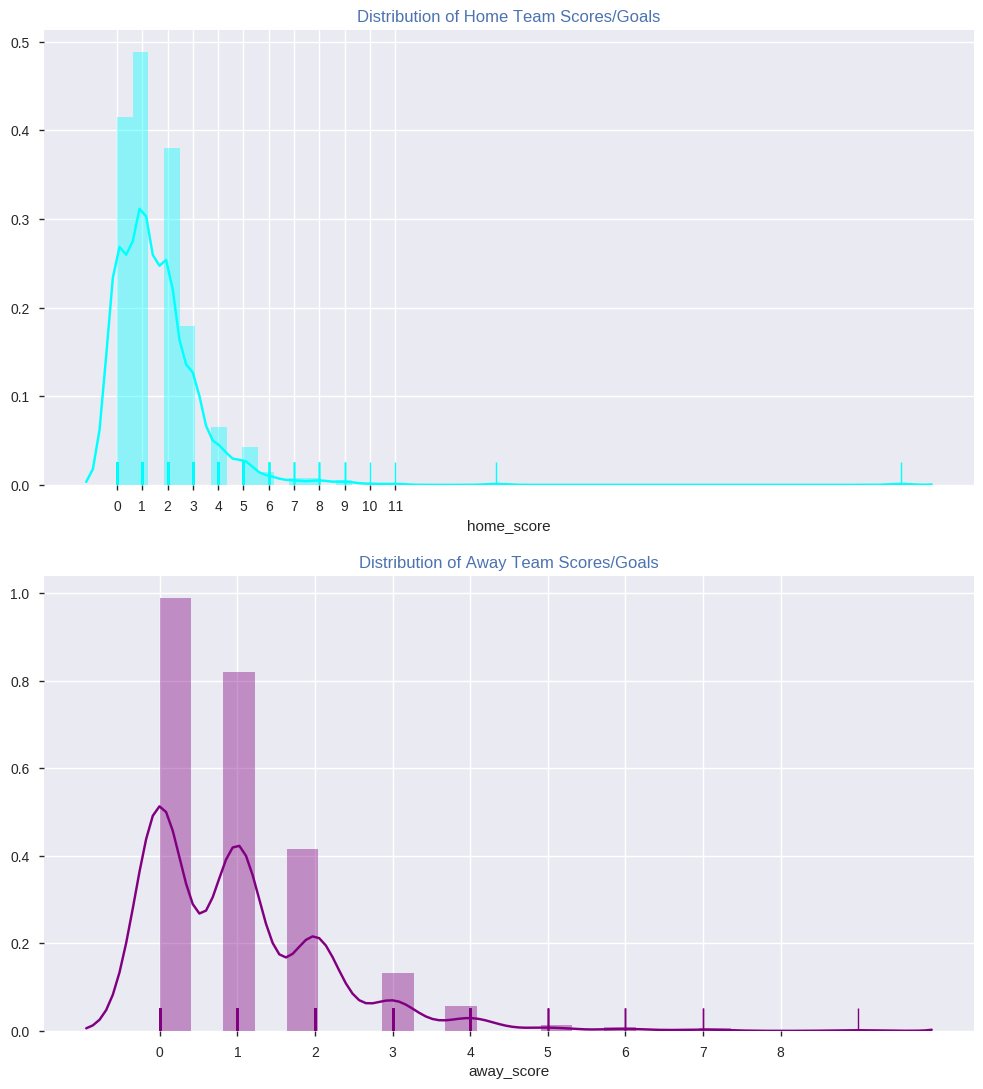

In [0]:
# Creating histograms to show the distribution of the goals for home teams and away teams
# Specifying the figure size
# Using seaborn for plotting
# Specifying the bins in the x axis
# Labeling title


plt.figure(figsize=(12,13), dpi = 100)
plt.subplot(211)
sns.distplot(df["home_score"],color="cyan",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Scores/Goals",color='b')


plt.subplot(212)
sns.distplot(df["away_score"],color="purple",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Scores/Goals",color='b')
plt.show()

> The histograms show that the home teams are highly likely to score at most one goal compared to the away team.

> The charts also show that the goals scored in both home and away team is skewed to the right.

> This means that there is a high probability of scoring more goals.
i.e. the outliers lie on the positive side.


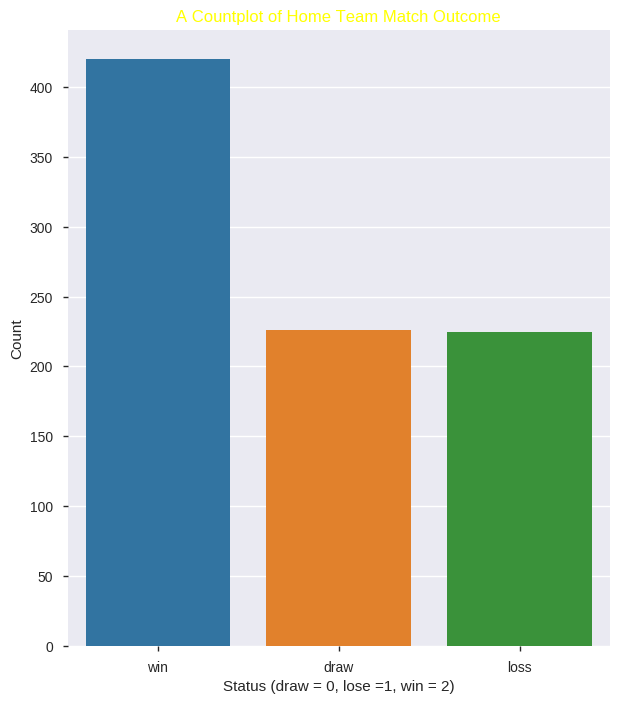

In [0]:
# The Home team Match results(draw = 0, lose =1, win = 2)
# Using a countplot to visualize these results
# Using Seaborn
# Labeling the x and y axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(df['home_status'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'yellow')
plt.show()

The bar chart above shows that in most cases the home team wins the match.

The home team is less likely to lose or draw in match.



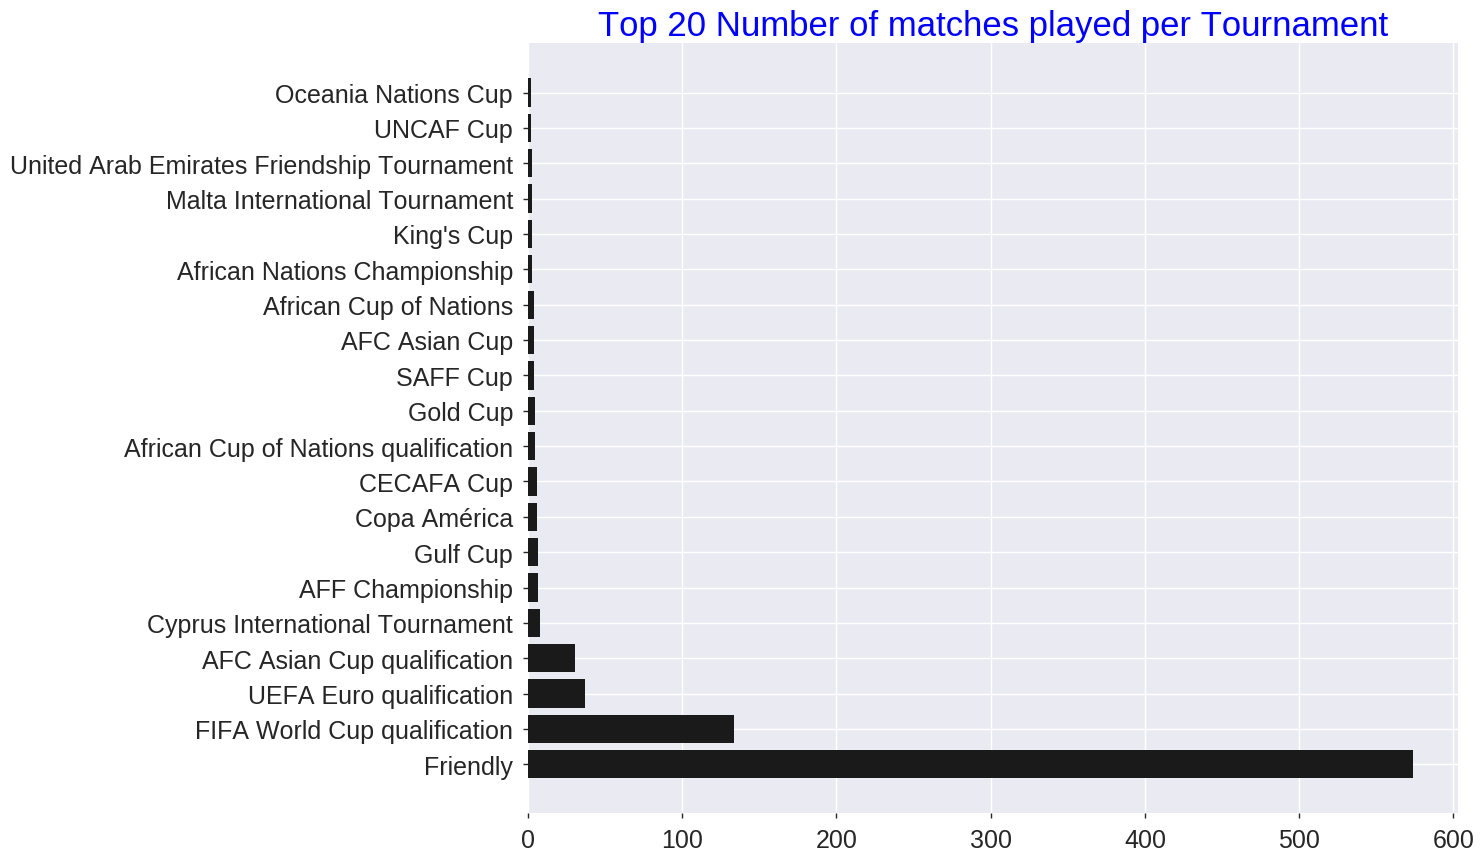

In [0]:
# tournament types 
tournament = df.groupby('tournament')['tournament'].count() # group by tournament 
tournament = pd.DataFrame({'name':tournament.index, 'number': tournament.values}) # create a dataframe 
tournament.sort_values(by = ['number'], ascending = False, inplace = True) # sort by number of matches played in descending order
top = tournament.head(20) # select only 20
plt.figure(figsize = (12, 10))
plt.barh(top.name,top.number, color = 'k') # plotting  a bar chat
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Top 20 Number of matches played per Tournament', fontsize = 25 , color = 'Blue')
plt.show()

Most of the matches played were Friendly followed by Fifa World Cup Qualification and Uefa Euro qualification

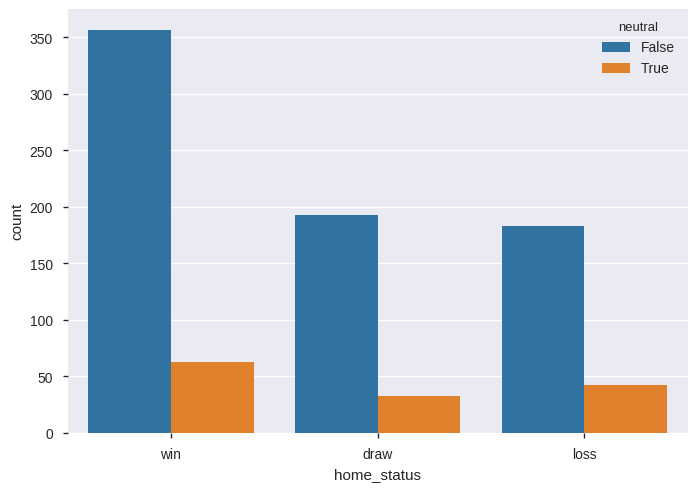

In [0]:
# Ploting the univariate summaries and recording our observations
#
# countplot of the home team results
sns.countplot(x='home_status', data=df, hue='neutral')

 > From the graph we can theorize that a high proportion of home teams win matches when played on neutral grounds than when the ground is partisan.

In [0]:
# Encoding the categorical columns 
#

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [0]:
df_encoded.head()

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year
0,0,20,150,3,1,16,0,2,1,58,21,0
1,0,23,90,1,1,17,0,0,0,7,13,0
2,0,40,153,5,0,16,0,2,1,34,93,0
3,0,59,125,1,0,17,0,2,1,64,85,0
4,0,111,7,1,3,16,0,1,2,66,4,0


# Multicollinearity
 * Checking for multicollinearity 
 * Dealing with multicollinearity

In [0]:
# Before we build a model we shall check if
# the independent variables are collinear/ correlated to each other

# Getting the pearson correation coefficient for each of the variables

corr = df_encoded.corr()
corr

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year
date,1.000000,0.014676,-0.003040,-0.008058,-0.038534,-0.069416,0.092770,0.004086,0.000486,0.208071,0.256374,0.991043
home_team_x,0.014676,1.000000,0.029351,0.000886,-0.041247,-0.077816,-0.073928,-0.005838,0.009472,0.009215,0.074429,0.019297
away_team,-0.003040,0.029351,1.000000,-0.063339,0.040733,-0.073116,0.014282,-0.040782,-0.000397,0.028788,-0.008880,-0.007115
home_score,-0.008058,0.000886,-0.063339,1.000000,-0.141162,-0.037268,0.007700,0.517758,-0.073146,-0.053300,0.314113,-0.004477
away_score,-0.038534,-0.041247,0.040733,-0.141162,1.000000,-0.002017,0.086450,-0.230710,0.449489,0.136276,-0.154118,-0.044550
tournament,-0.069416,-0.077816,-0.073116,-0.037268,-0.002017,1.000000,-0.034279,-0.016007,0.006987,-0.105121,-0.088795,-0.065027
neutral,0.092770,-0.073928,0.014282,0.007700,0.086450,-0.034279,1.000000,-0.002786,0.040018,0.058139,0.073172,0.093110
home_status,0.004086,-0.005838,-0.040782,0.517758,-0.230710,-0.016007,-0.002786,1.000000,0.433876,-0.065101,0.203601,0.008879
away_status,0.000486,0.009472,-0.000397,-0.073146,0.449489,0.006987,0.040018,0.433876,1.000000,0.090559,-0.075242,0.004368
home_rank,0.208071,0.009215,0.028788,-0.053300,0.136276,-0.105121,0.058139,-0.065101,0.090559,1.000000,0.534445,0.210820




The correlation matrix indicates that most variables are moderately or weakly correlated.

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent variables that are statistically significant.

We aim to create a model with the most significant variables.

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).

The VIF will help in determining the variables that are collinear or highly correlated with each other.

In [0]:
# checking for multicollinearity using the variance Inflation Factor (VIF) which is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year
date,56.721285,0.213914,-0.181548,0.228644,-0.606455,0.301065,0.004070,-0.420185,0.736350,-0.153717,0.488309,-56.322283
home_team_x,0.213914,1.028035,-0.028996,-0.011428,0.082904,0.080098,0.082169,0.112521,-0.115361,0.068399,-0.125887,-0.212312
away_team,-0.181548,-0.028996,1.013468,0.077895,-0.054079,0.071511,-0.012303,-0.032853,0.045954,-0.019226,0.000659,0.195396
home_score,0.228644,-0.011428,0.077895,1.889284,-0.606345,0.033849,0.007963,-1.427444,0.974227,0.235894,-0.460696,-0.161833
away_score,-0.606455,0.082904,-0.054079,-0.606345,1.973701,0.011403,-0.104713,1.363060,-1.492306,-0.182196,0.179057,0.679999
tournament,0.301065,0.080098,0.071511,0.033849,0.011403,1.029273,0.030006,0.023054,-0.028771,0.095038,0.008430,-0.256964
neutral,0.004070,0.082169,-0.012303,0.007963,-0.104713,0.030006,1.028935,-0.005514,-0.000002,0.020125,-0.085399,-0.085695
home_status,-0.420185,0.112521,-0.032853,-1.427444,1.363060,0.023054,-0.005514,3.025778,-2.077463,0.262565,-0.277876,0.471042
away_status,0.736350,-0.115361,0.045954,0.974227,-1.492306,-0.028771,-0.000002,-2.077463,2.688891,-0.245256,0.250373,-0.799306
home_rank,-0.153717,0.068399,-0.019226,0.235894,-0.182196,0.095038,0.020125,0.262565,-0.245256,1.656642,-1.037846,0.073346


We check VIFs along the diagonal.

VIFs values that are greater than 5 indicate the presence of multicollinearity.

If present, we remove the variable with the greatest VIF value.

From the correlation matrix there are no correlated independent variables as all have VIF values are below 5, which is the threshold.

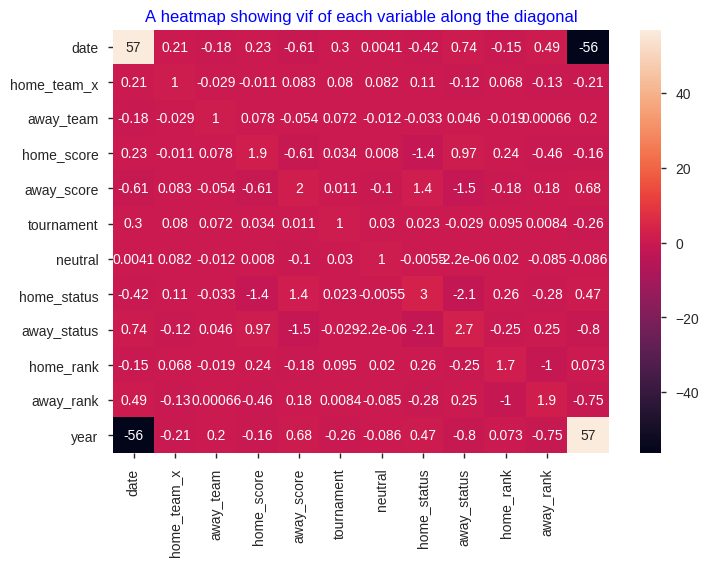

In [0]:
# Plotting a heat map to show the VIF visually.

vif = np.linalg.inv(corr.values)
sns.heatmap(vif, annot = True, xticklabels=['date' ,'home_team_x' ,'away_team', 'home_score' , 'away_score','tournament','neutral','home_status','away_status','home_rank' ,'away_rank'], yticklabels=['date' ,'home_team_x' ,'away_team', 'home_score' , 'away_score','tournament','neutral','home_status','away_status','home_rank' ,'away_rank','year'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'blue' )
plt.show()


# **Building a model**

## Approach 1: Polynomial approach 

### Model 1: Predict how many goals the home team scores

In [0]:
# Split the dataset into the features and target variable

X = df_encoded['home_rank'].values.reshape(-1, 1)

y = df_encoded['home_score']


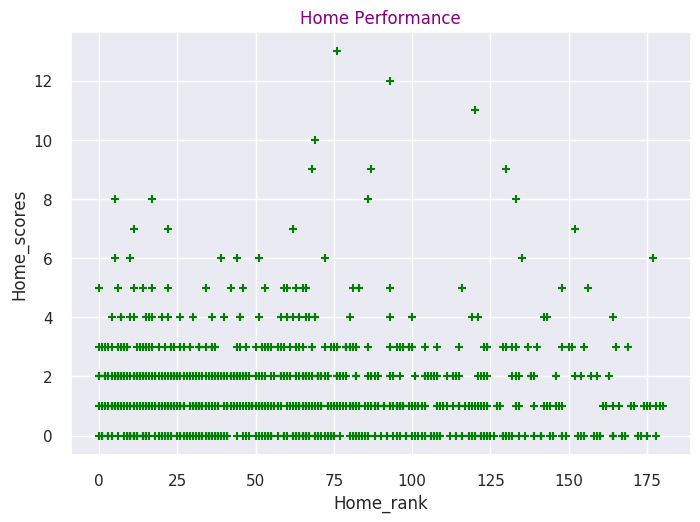

In [0]:
# Visualizing the dependent vs independent variable by plotting a scatter plot

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '+' , color = 'green') 
plt.title('Home Performance', color = 'purple')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

> The chart above shows that there is no particular observable trend but,
there are more points on the lower side of the scatter plot.

> Indicating in most cases the home team scores between 0 and 5 goals.

In [0]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [0]:
# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the polynomial regression model)

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Home_scores')

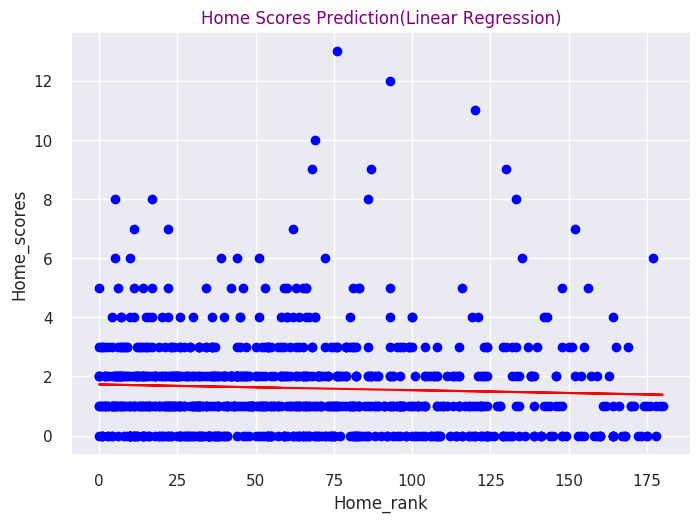

In [0]:
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.

plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)', color = 'purple')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')

The home scores prediction chart above shows the line of best fit does not pass through a majority of the points.
This is also known as **underfitting**.

Therefore, from the above visualization we conclude that the Linear regression model is not a good fit for this prediction.

Hence, we will  fit a polynomial regression and evaluate the results.


In [0]:
# Fitting the polynomial features to the independent variable(x)
# We will start  with a polynomial regression of degree 2

pr = PolynomialFeatures(degree = 2)
X_pol = pr.fit_transform(X)

In [0]:
# Fitting a polynomial Regression to the dataset.

poly_reg = LinearRegression()
poly_reg.fit(X_pol, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

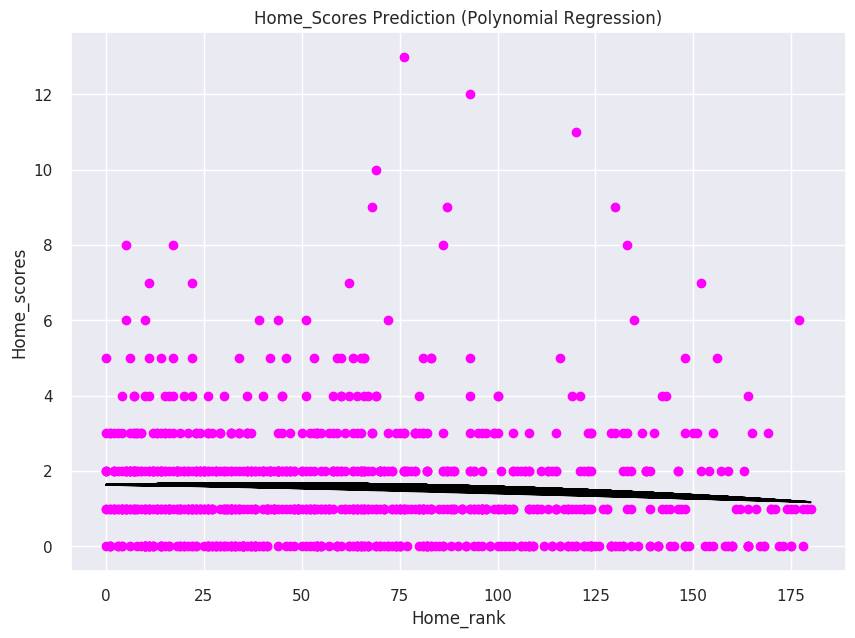

In [0]:
# Visualizing the polynomial Regression results
# Specifying the chart size
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.figure(figsize = (10,7))
plt.scatter(X, y, color='magenta')
plt.plot(X, poly_reg.predict(X_pol), color='black')
plt.title('Home_Scores Prediction (Polynomial Regression)')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


Using the polynomial regression model of degree 2, it is still not easy to draw meaningful conclusion from it.

We observe that the curve is not passing through as many points as we'd want hence we can conclude,from the above, that this graph is not fully optimized.

In [0]:
# Making predictions using our model

ypredpol = poly_reg.predict(X_pol)

In [0]:
# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, ypredpol)))
print('r2_score: ' , r2_score(y, ypredpol))

RMSE:  1.6412036186636556
r2_score:  0.003997319170288005


Root Mean Square Error (RMSE), is the standard deviation of the residuals (predicted errors).

Residuals are a measure of how far from the regression line data points are;

It tells you how concentrated the data is around the line of best fit.

Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

The lower the value the better

In [0]:
# Mean of the actual scores

np.mean(y) 

1.60849598163031

In [0]:
# Ten percent of the mean

1.60849598163031 * 0.1

0.16084959816303102

* Comparing the RMSE score = 1.64 with the 10% of actual scores mean = 0.16, it is above the actual scores mean.

* This means that the model is not efficient to use for predicting the home team scores.

* Hence we should try a model with more degrees to improve its efficiency.

### Model 2 : Predict how many goals the away team scores


In [0]:
# Model 2: Predict how many goals the away team scores given the away team rank

#
X = df_encoded['away_rank'].values.reshape(-1, 1)

y = df_encoded['away_score']

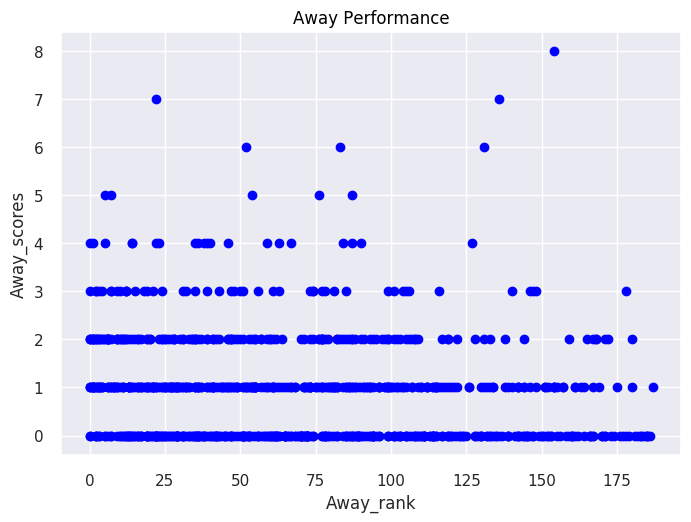

In [0]:
# Visualizing the dependent vs independent variable using a scatter plot

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = 'o' , color = 'blue') 
plt.title('Away Performance', color = 'black')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

# There is no particular observable trend but
# there are more points on the lower side of the scatter plot

The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the away team scores between 0 and 4 goals.

In [0]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [0]:
# Fit polynomial Regression to the dataset
#from sklearn.preprocessing import PolynomialFeatures 
#from sklearn.linear_model import LinearRegression

#poly_features = PolynomialFeatures(include_bias = False, degree = 3)
#X_train = poly_features.fit_transform(X_train)
#X_test = poly_features.fit_transform(X_test)
# Training the model
#pol_reg = LinearRegression()
#pol_reg.fit(X_train, y_train)

In [0]:
# Fitting the polynomial features to the X

pr = PolynomialFeatures(degree = 3)
X_pol = pr.fit_transform(X)

In [0]:
# Fitting a polynomial Regression to the dataset

poly_reg = LinearRegression()
poly_reg.fit(X_pol, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Prints y-intercept
print(poly_reg.intercept_)
# Prints the beta coefficients in order
print(poly_reg.coef_)

1.4720533414567225
[ 0.00000000e+00 -1.87681412e-02  2.08731084e-04 -7.57281801e-07]


In [0]:
# Visualizing the polynomial Regression results using a scatter plot

plt.scatter(X, y, color='black')
plt.plot(X, pol_reg.predict(X_pol), color='gold')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')

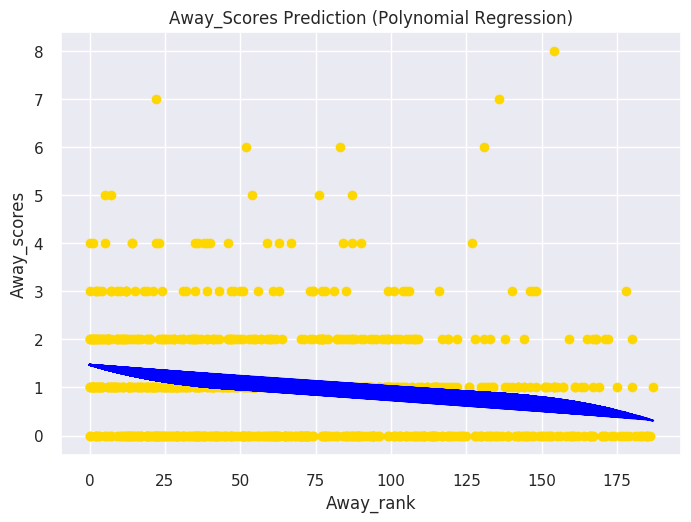

In [0]:
# Visualizing the polynomial Regression results using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='gold')
plt.plot(X, poly_reg.predict(X_pol), color='blue')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

Using the polynomial regression model of degree 3,

it is still not easy to draw meaningful conclusion from it.

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.

This is underfitting.

The polynomial regression is not a good model to predict how many goals the away team scores given the away team rank.

In [0]:
# Making predictions
#
y_pred_pol = poly_reg.predict(X_pol)

In [0]:
# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_pol)))
print('r2_score: ' , r2_score(y, y_pred_pol))

RMSE:  1.1290417540762252
r2_score:  0.0303017896458303


In [0]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)

1.0034443168771527

In [0]:
# Ten percent of the mean

1.0034443168771527 * 0.1

0.10034443168771529

Comparing the RMSE = 1.13 with 10% of the actual mean = 0.1

The RMSE is very high

Therefore this is not a good model to use for predicting the away score

## Approach 2: Logistic Regression Model

- Logistic regression is a predictive analysis. 

- Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
- Logistic Regression is used when the dependent variable(target) is categorical.
- In this model, we will be predicting whether the home team (Wins, Losses or Draws) in a match.


In [0]:
# Viewing the first two observations before splittig our dataset

df_encoded.head(2)

,date,home_team_x,away_team,home_score,away_score,tournament,neutral,home_status,away_status,home_rank,away_rank,year
0,0,20,150,3,1,16,0,2,1,58,21,0
1,0,23,90,1,1,17,0,0,0,7,13,0


In [0]:
# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = df_encoded.drop(['away_status', 'home_status', 'home_score', 'away_score'], axis = 1)
y = df_encoded.home_status


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [0]:
# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [0]:
# Evalauting the model

# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.49142857142857144


The model can correctly predict if home team will (won, lost or drew) in a match with an accuracy of 49.14%